Цель: применить на практике базовые ансамблевые методы

Описание задания:
В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с сайта. Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [ ]:
data = pd.read_csv("/content/heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

2. Подготовьте датасет к обучению моделей.
a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

In [ ]:
"""
a) Категориальные переменные переведите в 
цифровые значения. 
Можно использовать pd.get_dummies, 
preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
"""

categorical = ['Sex', 'ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope']
df_dum = pd.get_dummies(data, columns = categorical, drop_first = True)
df_dum.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


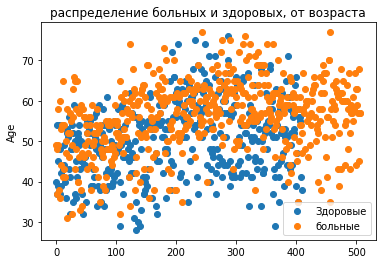

In [ ]:
"""
 b) *Постройте 1-2 графика на выбор. 
 Визуализация должна быть основана 
 на исследуемых данных и быть полезной 
 (из графика можно сделать вывод об особенностях датасета/класса/признака).
"""
data_0 = data[data['HeartDisease'] == 0]
data_1 = data[data['HeartDisease'] == 1]
# data_0.head()
plt.scatter(range(len(data_0)),data_0['Age'], label = 'Здоровые')
plt.scatter( range(len(data_1)), data_1['Age'], label = 'больные')
plt.legend();
plt.ylabel('Age');
plt.title('распределение больных и здоровых, от возраста');
# => в возрасте < 30 нет больных сердец,
# а при > 70  здоровых меньше больных.

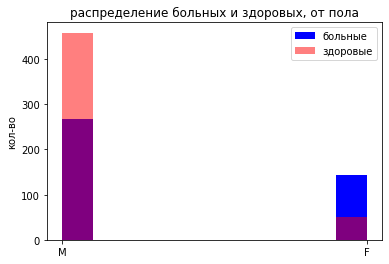

In [ ]:
plt.hist(data_0['Sex'], color='blue', label = 'больные');
plt.hist(data_1['Sex'], color='red', label = 'здоровые', alpha=0.5 );
plt.legend();
plt.title('распределение больных и здоровых, от пола');
plt.ylabel('кол-во');
# неприятно, больных женщин больше здоровых, а у мужчин наоборот.

3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [ ]:
from sklearn.model_selection import train_test_split
y = df_dum['HeartDisease']
X = df_dum.copy()
X = X.drop(columns = 'HeartDisease')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

In [ ]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,1,0,1,0,1,0,0,0,1


4.Обучите дерево решений на обучающем множестве. Используйте следующие модели:
a) tree.DecisionTreeClassifier
b) ensemble.RandomForestClassifier

In [ ]:
# a) tree.DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=7)
tree.fit(X_train, y_train)
#  b) ensemble.RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=7)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=7)

5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.

In [ ]:
from sklearn.metrics import classification_report
print(f"для DecisionTreeClassifier:\n {classification_report(y_test, tree.predict(X_test))}")
print(f"для RandomForestClassifier:\n {classification_report(y_test, forest.predict(X_test))}")
d_all_acc = {}
d_all_acc['DecisionTreeClassifier'] = 0.79
d_all_acc['RandomForestClassifier'] = 0.88
# точность на лесе немного подросла


для DecisionTreeClassifier:
               precision    recall  f1-score   support

           0       0.82      0.73      0.78        90
           1       0.77      0.85      0.81        94

    accuracy                           0.79       184
   macro avg       0.80      0.79      0.79       184
weighted avg       0.80      0.79      0.79       184

для RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        90
           1       0.86      0.91      0.89        94

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [ ]:
X.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

In [ ]:
imp = pd.Series(forest.feature_importances_, index = X.columns).sort_values(ascending=False)
imp

ST_Slope_Up          0.154785
Oldpeak              0.120102
MaxHR                0.115618
Cholesterol          0.112609
ST_Slope_Flat        0.092155
Age                  0.085979
ExerciseAngina_Y     0.077601
RestingBP            0.070512
ChestPainType_ATA    0.048059
Sex_M                0.031906
ChestPainType_NAP    0.026200
FastingBS            0.026161
RestingECG_Normal    0.017089
ChestPainType_TA     0.011184
RestingECG_ST        0.010040
dtype: float64

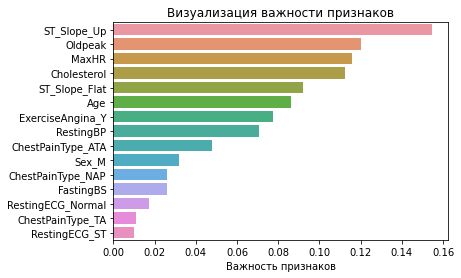

In [ ]:
import seaborn as sns
%matplotlib inline
sns.barplot(x=imp, y=imp.index)
plt.title('Визуализация важности признаков');
plt.xlabel('Важность признаков');

In [ ]:
# plt.barh(imp.index,imp)

7.Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.
a) Повторите п. 5

In [ ]:
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier(DecisionTreeClassifier(),n_estimators=100,max_samples=0.5, max_features=0.5,random_state=7).fit(X_train,y_train)
print(f"для BaggingClassifier:\n {classification_report(y_test, bagg.predict(X_test))}")
d_all_acc['BaggingClassifier'] = 0.88
# 

для BaggingClassifier:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        90
           1       0.85      0.93      0.89        94

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



8. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.
a) Повторите п. 5

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier

est = [('tree', DecisionTreeClassifier()),('forest',RandomForestClassifier()), ('SVC',LinearSVC())]
stack_all = StackingClassifier(estimators=est)

"""
final_estimatorestimator, default=None
A classifier which will be used to combine the base estimators. 
The default classifier is a LogisticRegression.
"""
stack_all.fit(X_train, y_train)
print(f"для StackingClassifier:\n {classification_report(y_test, bagg.predict(X_test))}")
d_all_acc['StackingClassifier'] = 0.88

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


для StackingClassifier:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        90
           1       0.85      0.93      0.89        94

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


9. Сформулируйте выводы по проделанной работе.
a) Сравните метрики построенных моделей.
b) Напишите свое мнение, какая модель наилучшая и почему.
Для получения зачета по этому домашнему заданию, минимально, должны быть обучены следующие модели: дерево решений, стекинг трех моделей. В данных должны быть обработаны категориальные значения.

In [ ]:
pd.DataFrame.from_dict(d_all_acc, orient='index', columns=['accuracy'])
'''
после перехода к решпющему лесу - качество модели не меняется.
'''

,accuracy
DecisionTreeClassifier,0.79
RandomForestClassifier,0.88
BaggingClassifier,0.88
StackingClassifier,0.88


Результат: получены знания по использованию базовых ансамблевых методов.